<a href="https://colab.research.google.com/github/cybertraining-dsc/sp21-599-354/blob/main/project/code/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image, ImageOps
from tqdm import tqdm

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import time

import pandas as pd

from zipfile import ZipFile


Pre-Processing data. First step is to get an idea of how large the images in each dataset are. I will be using black-grass, sugarbeets, and shepherd's purse as the plants to identify. All the images will be squares, so the max width or height of each image is recorded. The hisograms give an idea of the size ranges.

In [2]:
black_grass_imgs = 333
shepherds_purse_imgs = 276
sugar_beet_imgs = 464

black_grass_size = []
shepherds_purse_size = []
sugar_beet_size = []

To get an understanding of the sizes of the images and what should be the standard, the largest dimension of the images are recorded in the histograms to see if a good base line can be found.

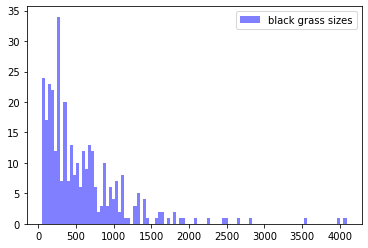

In [3]:
for i in range(1,black_grass_imgs+2):
  if i == 100:
    i += 1
  img = Image.open('/content/drive/MyDrive/plant_data/Black-grass/'+str(i)+'.png')
  w, h = img.size
  black_grass_size.append(max(w, h))


num_bins = 100
n, bins, patches = plt.hist(black_grass_size, num_bins, facecolor='blue', alpha=0.5, label="black grass sizes")
plt.legend()
plt.show()


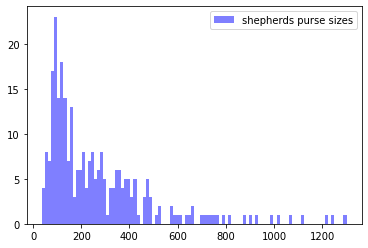

In [4]:
for i in range(1,shepherds_purse_imgs+1):
  img = Image.open('/content/drive/MyDrive/plant_data/Shepherds-purse/'+str(i)+'.png')
  w, h = img.size
  shepherds_purse_size.append(max(w, h))


num_bins = 100
n, bins, patches = plt.hist(shepherds_purse_size, num_bins, facecolor='blue', alpha=0.5, label="shepherds purse sizes")
plt.legend()
plt.show()

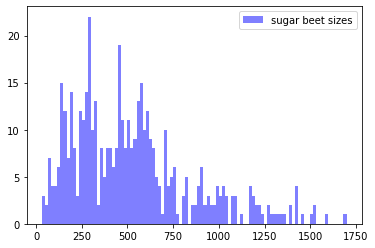

In [5]:
for i in range(1,sugar_beet_imgs+1):
  img = Image.open('/content/drive/MyDrive/plant_data/Sugar-beet/'+str(i)+'.png')
  w, h = img.size
  sugar_beet_size.append(max(w, h))


num_bins = 100
n, bins, patches = plt.hist(sugar_beet_size, num_bins, facecolor='blue', alpha=0.5, label="sugar beet sizes")
plt.legend()
plt.show()

In [6]:
img_size = 300
black_grass_set = []
shepherds_purse_set = []
sugar_beet_set = []

It looks like a size of 300x300 pixels will be enough to get a good subset of each type of plant. The ultimae size of the images with padding must be large enough to keep the full image after rotation.

In [7]:
#ids columns for rotation, straight, and test
train_rot_id = []
train_str_id = []
test_id = []

#label colums for rotation, straight, and test
train_rot_label = []
train_str_label = []
test_label = []

#starting rotation and straight ids, test is based on straight
tr_id = 0
ts_id = 0

The images in the CNN are labeled and navigated with CSVs that have two columns. One is an id that connects it to the name of the image, and the other is the label to identify the image. In this case, black grass will have label 0, shepherd's purse will have label 1, and sugar beet will have label 2. Above, the setup for the CSV structures are formed.

Below, the images are all set to be 400x400, rotated as applicable, and saved as either test or training images. The straight and rotated ids are printed out for each section to help keep track of how many files to expect.

In [8]:
for i in range(1,black_grass_imgs+1):
  if i == 100:
    i += 1
  if black_grass_size[i-1] <= img_size:
    img = Image.open(f'/content/drive/MyDrive/plant_data/Black-grass/{i}.png')
    w, h = img.size
    wd, hd = int((400-w)/2), int((400-h)/2)
    l, t, r, b = wd, hd, 400-w-wd, 400-h-hd
    img = ImageOps.expand(img, border=(l, t, r, b), fill='black')
    if ts_id % 10 == 0:
      test_id.append(ts_id)
      test_label.append(0)
      img.save(f'/content/drive/MyDrive/plant_data/test/{ts_id}.png')
      ts_id += 1
    else:
      train_str_id.append(ts_id)
      train_str_label.append(0)
      img.save(f'/content/drive/MyDrive/plant_data/train_str/{ts_id}.png')
    
      for rot in range(0, 360, 10):
        train_rot_id.append(tr_id)
        train_rot_label.append(0)
        rot_img = img.rotate(rot)
        rot_img.save(f'/content/drive/MyDrive/plant_data/train_rot/{tr_id}.png')
        tr_id += 1

      ts_id += 1

print(ts_id, tr_id)





133 4284


In [9]:


for i in range(1,shepherds_purse_imgs):
  if shepherds_purse_size[i] <= img_size:
    img = Image.open(f'/content/drive/MyDrive/plant_data/Shepherds-purse/{i}.png')
    shepherds_purse_set.append(img)
    w, h = img.size
    wd, hd = int((400-w)/2), int((400-h)/2)
    l, t, r, b = wd, hd, 400-w-wd, 400-h-hd
    img = ImageOps.expand(img, border=(l, t, r, b), fill='black')
    if ts_id % 10 == 0:
      test_id.append(ts_id)
      test_label.append(1)
      img.save(f'/content/drive/MyDrive/plant_data/test/{ts_id}.png')
      ts_id += 1
    else:
      train_str_id.append(ts_id)
      train_str_label.append(1)
      img.save(f'/content/drive/MyDrive/plant_data/train_str/{ts_id}.png')
    
      for rot in range(0, 360, 10):
        train_rot_id.append(tr_id)
        train_rot_label.append(1)
        rot_img = img.rotate(rot)
        rot_img.save(f'/content/drive/MyDrive/plant_data/train_rot/{tr_id}.png')
        tr_id += 1

      ts_id += 1

print(ts_id, tr_id)



323 10440


In [10]:
for i in range(1, sugar_beet_imgs):
  if sugar_beet_size[i] <= img_size:
    img = Image.open(f'/content/drive/MyDrive/plant_data/Sugar-beet/{i}.png')
    sugar_beet_set.append(img)
    w, h = img.size
    wd, hd = int((400-w)/2), int((400-h)/2)
    l, t, r, b = wd, hd, 400-w-wd, 400-h-hd
    img = ImageOps.expand(img, border=(l, t, r, b), fill='black')
    if ts_id % 10 == 0:
      test_id.append(ts_id)
      test_label.append(2)
      img.save(f'/content/drive/MyDrive/plant_data/test/{ts_id}.png')
      ts_id += 1
    else:
      train_str_id.append(ts_id)
      train_str_label.append(2)
      img.save(f'/content/drive/MyDrive/plant_data/train_str/{ts_id}.png')
    
      for rot in range(0, 360, 10):
        train_rot_id.append(tr_id)
        train_rot_label.append(2)
        rot_img = img.rotate(rot)
        rot_img.save(f'/content/drive/MyDrive/plant_data/train_rot/{tr_id}.png')
        tr_id += 1

      ts_id += 1

print(ts_id, tr_id)

467 15120


Finally, the CSVs are formed, shuffled to mix up the data, and saved as csv files.

In [11]:
train_str = pd.DataFrame({'id':train_str_id, 'label':train_str_label})
train_rot = pd.DataFrame({'id':train_rot_id, 'label':train_rot_label})
test = pd.DataFrame({'id':test_id, 'label':test_label})

train_str=train_str.sample(frac=1).reset_index(drop=True)
train_rot=train_rot.sample(frac=1).reset_index(drop=True)
test=test.sample(frac=1).reset_index(drop=True)

train_str.to_csv('/content/drive/MyDrive/plant_data/train_str.csv', index=False)
train_rot.to_csv('/content/drive/MyDrive/plant_data/train_rot.csv', index=False)
test.to_csv('/content/drive/MyDrive/plant_data/test.csv', index=False)
